06-3
주성분 분석
- 차원과 차원 축소
 : 머신러닝에서는 데이터가 가진 속성, 즉 특성을 차원이라고 한다.
   데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬수 있는 방법을 차원축소라고 한다.
-PCA(주성분 분석)
 : 대표적인 차원 축소 알고리즘.
  

In [ ]:
# PCA 클래스
# 과일 사진 데이터 다운로드하여 넘파이 배열로 적재
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d =fruits.reshape(-1,100*100)

--2024-02-05 07:41:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-02-05 07:41:42--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-02-05 07:41:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
# PCA 클래스로 주성분 분석-n_components 매개변수에 주성분 개수 지정
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# 배열의 크기 확인
# 배열의 첫번째 차원은 지정한 주성분 개수, 두번째 차원은 항상 원본 데이터의 특성 개수와 같음.
print(pca.components_.shape)

(50, 10000)


In [5]:
# 원본 데이터와 차원이 같으므로 주성분을 100x100크기의 이미지처럼 출력.
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    # n = 샘플 개수
    n= len(arr)
    # 한줄에 10개씩 이미지 그리기. 샘플 개수를 10으로 나누어 전체 행 개수를 계산.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            # n 개까지만 그리기
            if i *10 +j <n:
                axs[i,j].imshow(arr[i*10 +j], cmap ='gray_r')
            axs[i,j].axis('off')
    plt.show()

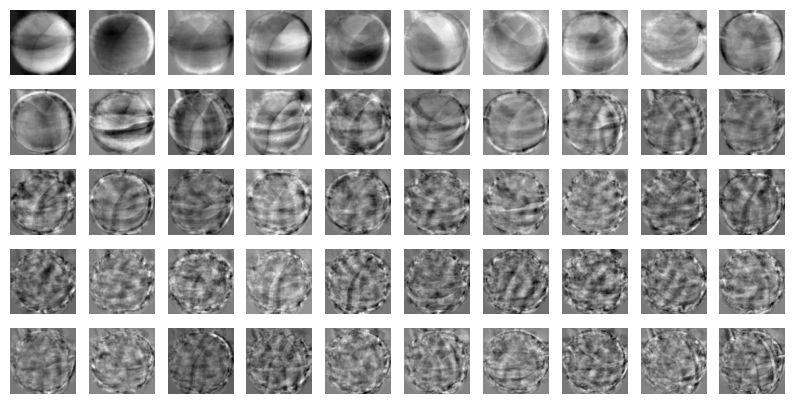

In [6]:
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸것.
draw_fruits(pca.components_.reshape(-1,100,100))

In [7]:
# PCA의 transform()메서드를 사용해 원본 데이터의 차원을 50으로 줄이기
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


원본 데이터 재구성

In [10]:
# 10,000개의 특성 복원하기
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


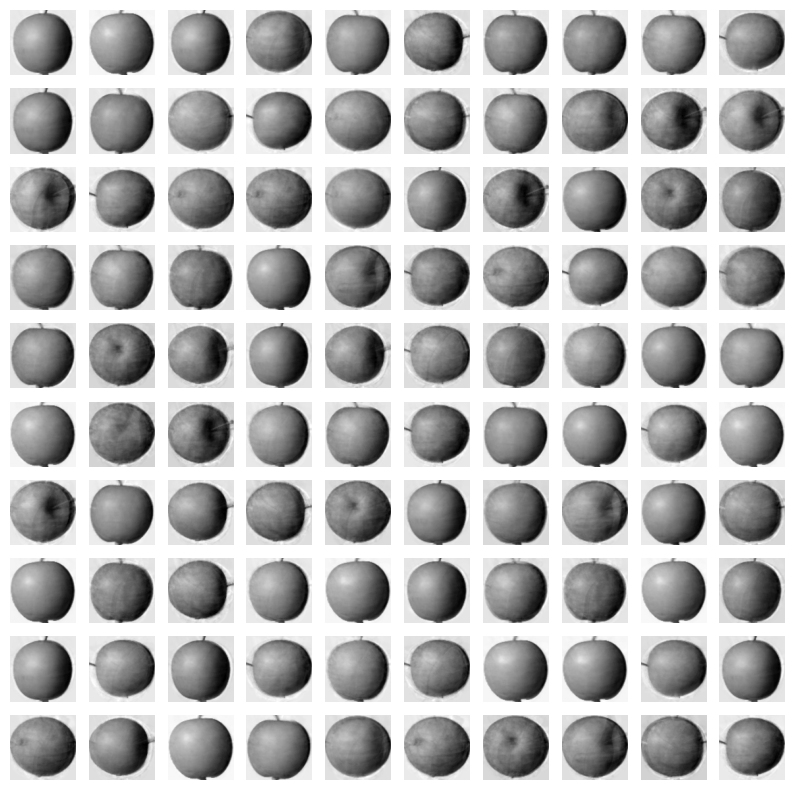

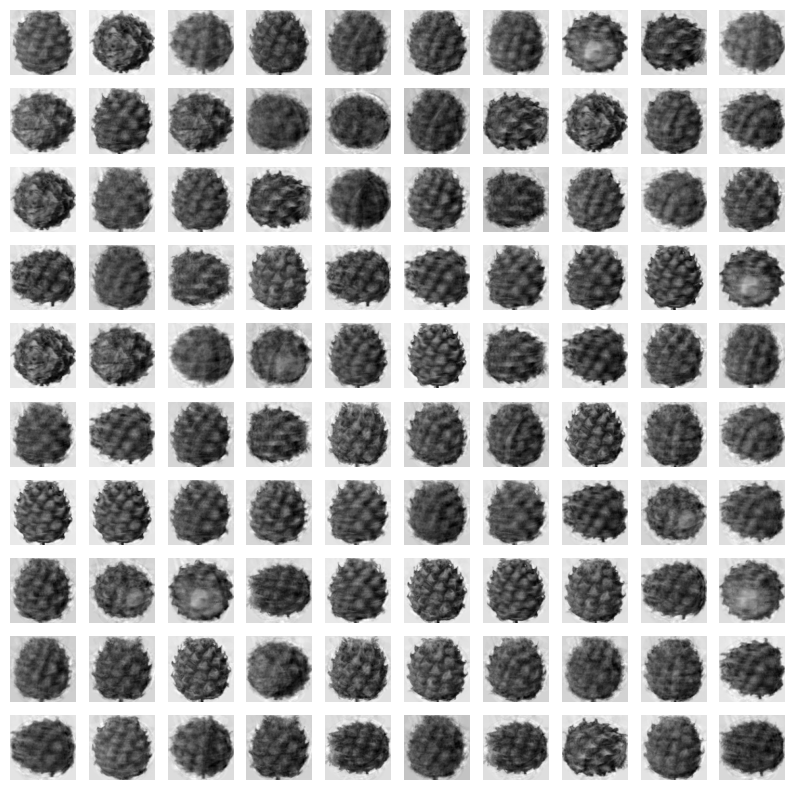

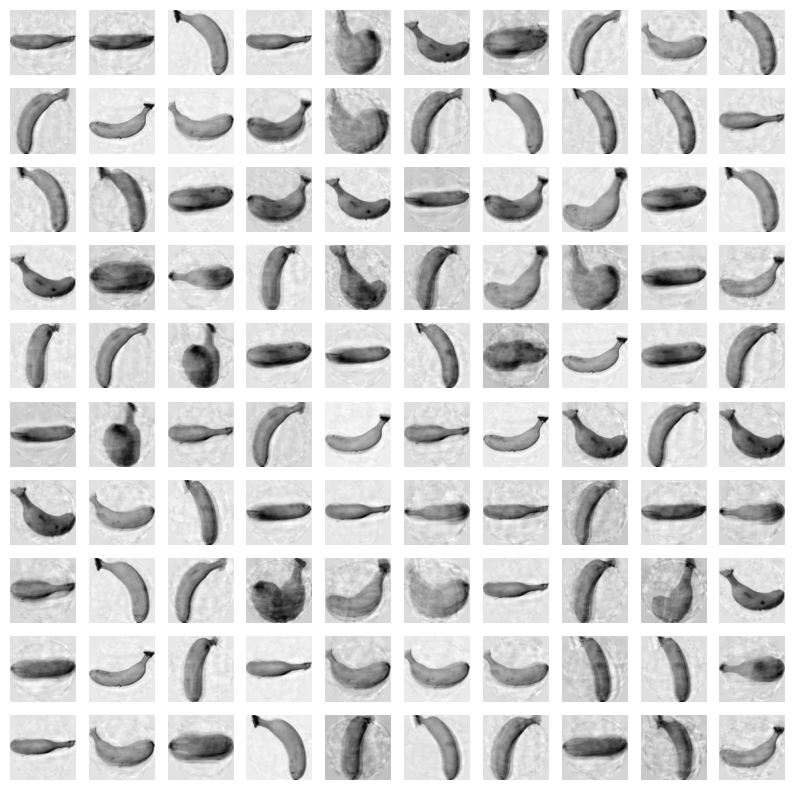

In [11]:
# 100 X 100크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

설명된 분산
: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값


In [12]:
#  각 주성분의 설명된 분산비율을 모두 더하여 총 분산 비율확인
print(np.sum(pca.explained_variance_ratio_))

0.9215438354557597


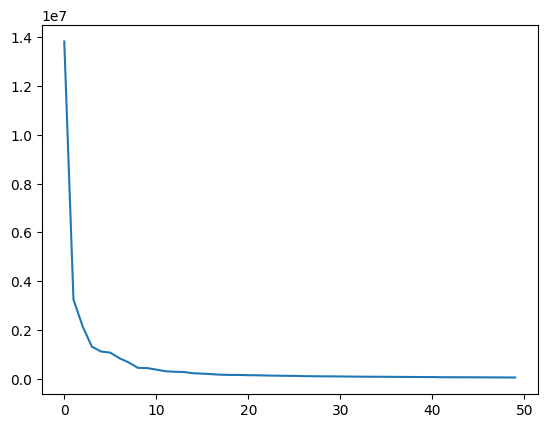

In [13]:
# 그래프로 출력
plt.plot(pca.explained_variance_)
plt.show()

다른 알고리즘과 함께 사용하기
-과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도학습에 적용해 보고 차이 확인

In [18]:
# LogisticRegression 모델 만들기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
# 사과- 0, 파인애플 - 1, 바나나 - 2로 타깃값 지정하여 타깃 데이터 만들기
target = np.array([0]*100 + [1]*100 + [2]*100)

In [22]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.0423505306243896


In [23]:
# PCA로 축소한 fruits_pca를 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04201207160949707


In [24]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기
pca = PCA(n_components =0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
# 주성분 개수 확인
print(pca.n_components_)

2


In [26]:
#  원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
# 교차검증
scores= cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.026782512664794922


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [28]:
# k-평균 알고리즘으로 클러스터 찾아보기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts =True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


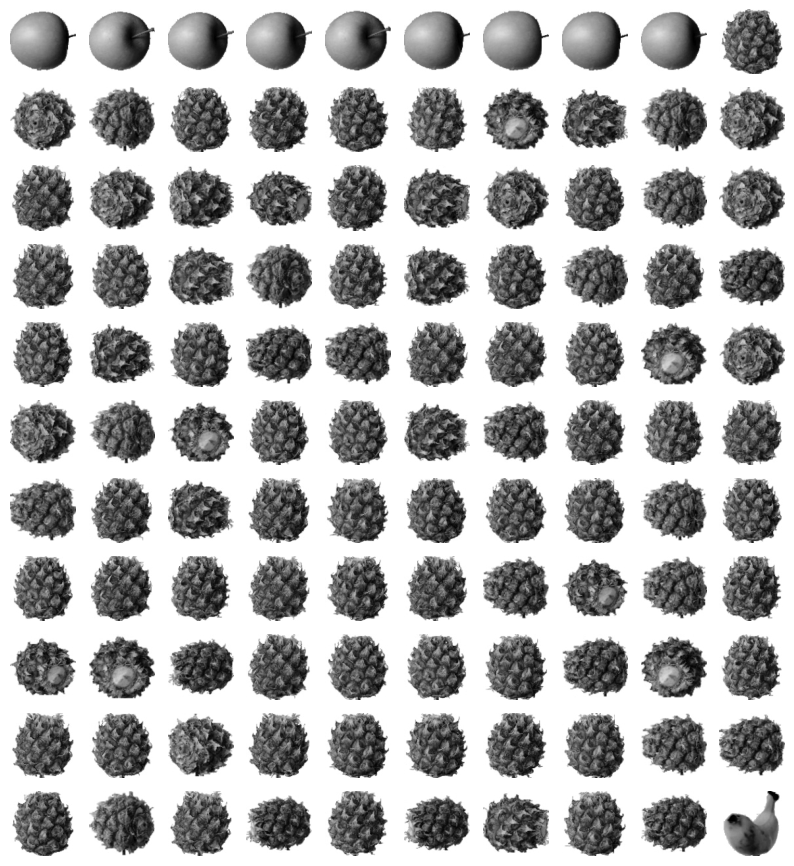

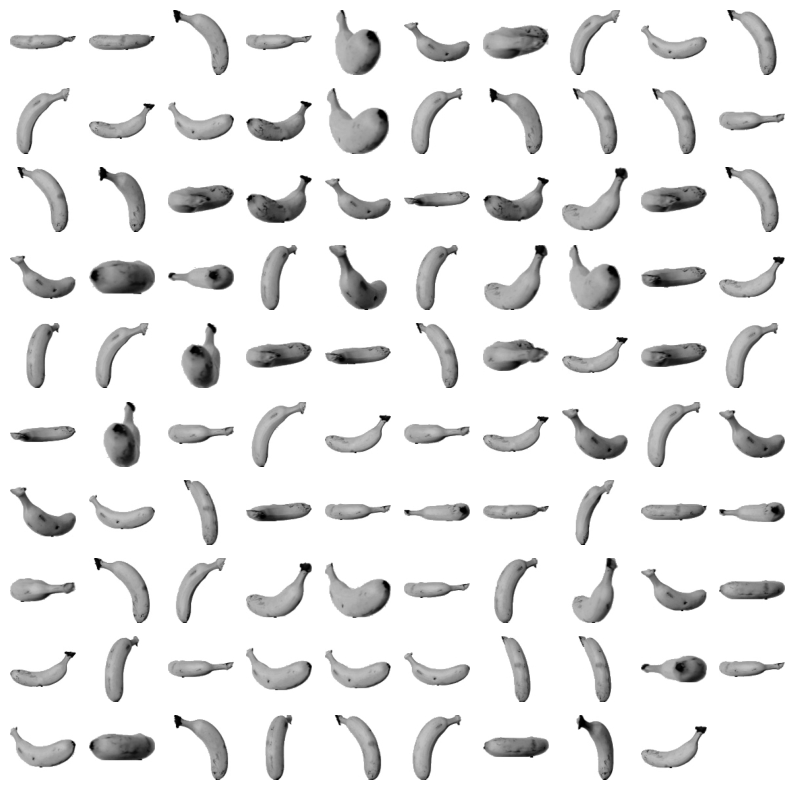

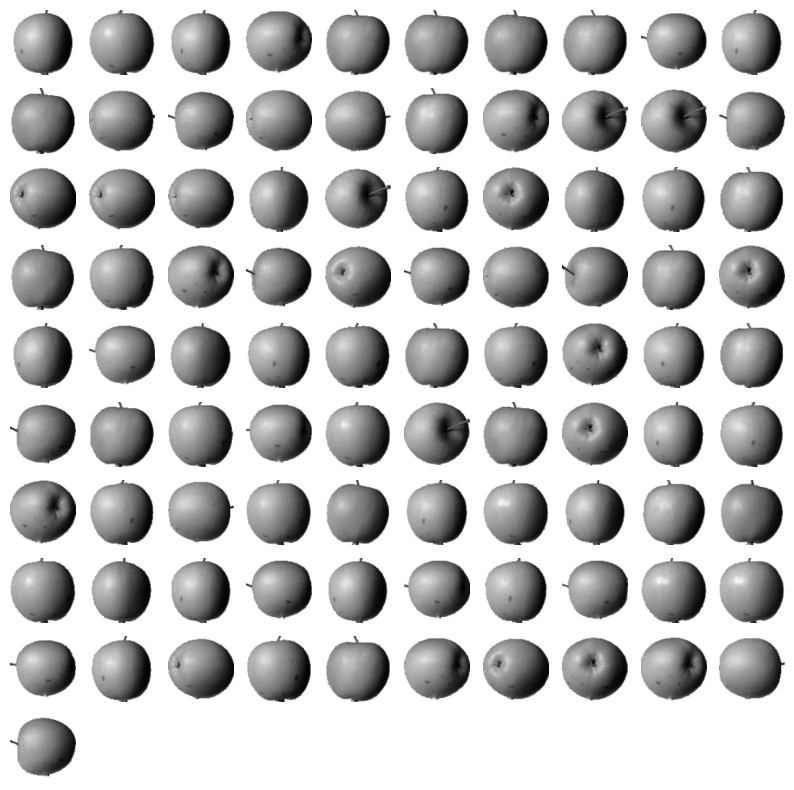

In [30]:
# 과일 이미지 출력
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

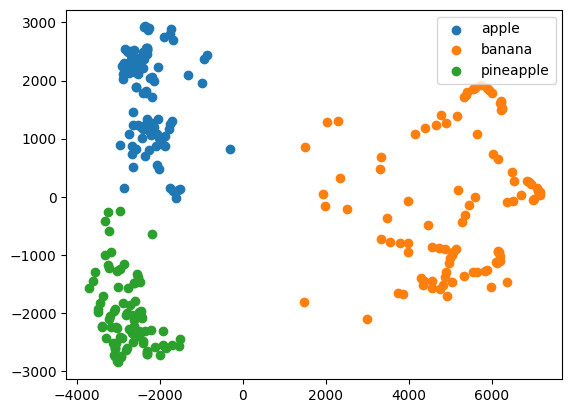

In [32]:
#  클러스터별로 나누어 산점도 그리기
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()